<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
# %pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Get shape of data.
print(f"Shape of data: {data.shape}")

# Get the number of rows and columns in data.
print(f"data has {data.shape[0]} rows and {data.shape[1]} columns.")

# Get column names of data.
print(f"Column name of data: {data.columns.values.tolist()}")

Shape of data: (506, 14)
data has 506 rows and 14 columns.
Column name of data: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
# Check for NaN values in data.
print(f"Any NaN values in data: {data.isna().values.any()}.")

# Check for duplicated values in data.
print(f"Any duplicated values in data: {data.duplicated().values.any()}.")

Any NaN values in data: False.
Any duplicated values in data: False.


In [ ]:
# Alternative way to check for NaN and duplicated values in data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


## Descriptive Statistics

**Challenge**

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature?
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [ ]:
# Calculate how many students are there per teacher on average.
print(f"How many students are there per teacher on average? \n{data.PTRATIO.mean():.4}\n")

# Calculate the average price of a home in the dataset.
print(f"What is the average price of a home in the dataset? \n{data.PRICE.mean():.4}")

How many students are there per teacher on average? 
18.46

What is the average price of a home in the dataset? 
22.53


**What is the CHAS feature?**

CHAS  stands for Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). CHAS captures the amenities of a riverside location and thus the coefficient should be positive.

In [ ]:
data.CHAS.unique()

array([0., 1.])

**What are the minimum and the maximum value of the CHAS and why?**

Since CHAS has only two possible values. The minimum value for CHAS is 0 and the maximum values for CHAS is 1.

Either the tract bound the Charles river or it simply does not. Thus, CHAS is binary.

In [ ]:
# Calculate the maximum and the minimum number of rooms per dwelling in the dataset?
print(f"Minimum number of room per dwelling in the dataset: {data.RM.min()}.")
print(f"Maximum number of room per dwelling in the dataset: {data.RM.max()}.")

Minimum number of room per dwelling in the dataset: 3.561.
Maximum number of room per dwelling in the dataset: 8.78.


## Visualise the Features

**Challenge**: Having looked at some descriptive statistics, visualise the data for your model. Use [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables:
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways.

Try setting the `aspect` parameter to `2` for a better picture.

What do you notice in the distributions of the data?

#### House Prices 💰

<Figure size 1280x960 with 0 Axes>

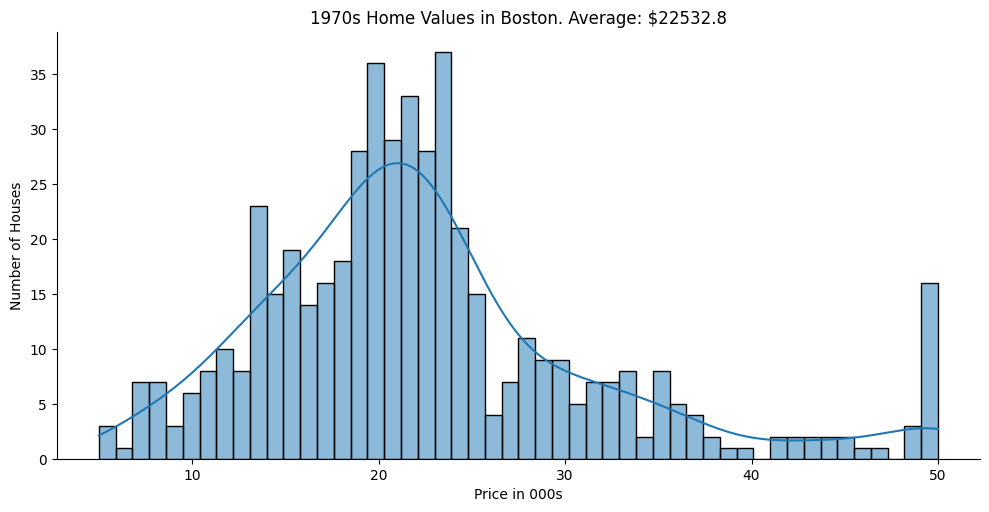

In [ ]:
plt.figure(dpi=200)
sns.displot(
    x=data.PRICE,
    kde=True,
    aspect=2,
    bins=50,
)
plt.title(f'1970s Home Values in Boston. Average: ${1000*data.PRICE.mean():.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Number of Houses')
plt.show()

Note there is a spike in the number homes at the very right tail at the $50,000 mark. 🤔

#### Distance to Employment - Length of Commute 🚗

<Figure size 1280x960 with 0 Axes>

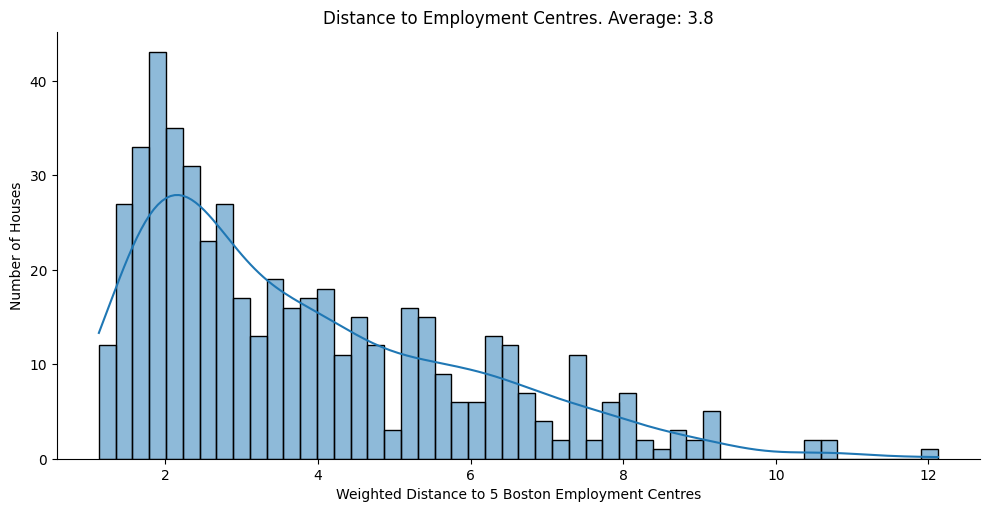

In [ ]:
plt.figure(dpi=200)
sns.displot(
    x=data.DIS,
    bins=50,
    kde=True,
    aspect=2,
)
plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Number of Houses')
plt.show()

On average most homes are about 3.8 miles away from work. There are fewer and fewer homes the further out we go.

#### Number of Rooms

<Figure size 1280x960 with 0 Axes>

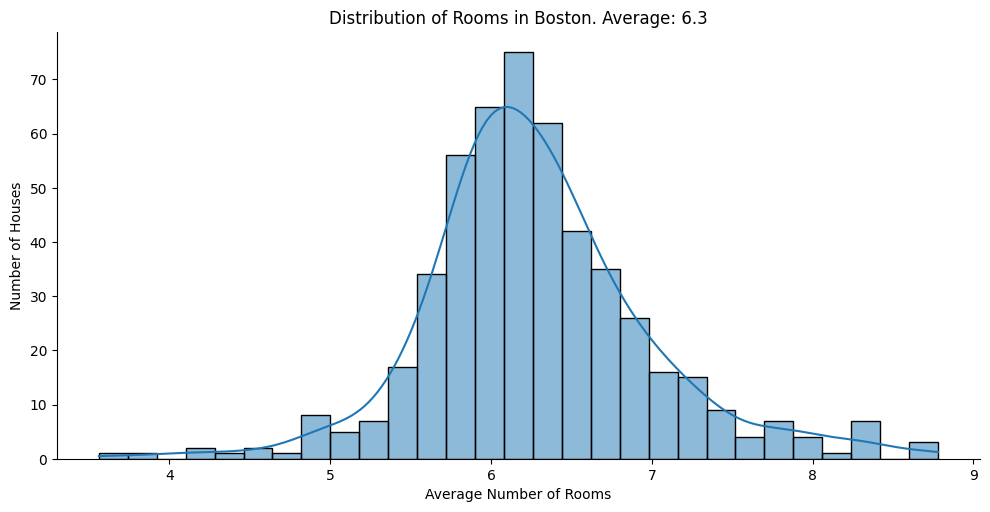

In [ ]:
plt.figure(dpi=200)
sns.displot(
    x=data.RM,
    kde=True,
    aspect=2,
)
plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Number of Houses')
plt.show()

A vast majority of Boston houses have 5-7 rooms in their houses.

#### Access to Highways 🛣

<Figure size 1280x960 with 0 Axes>

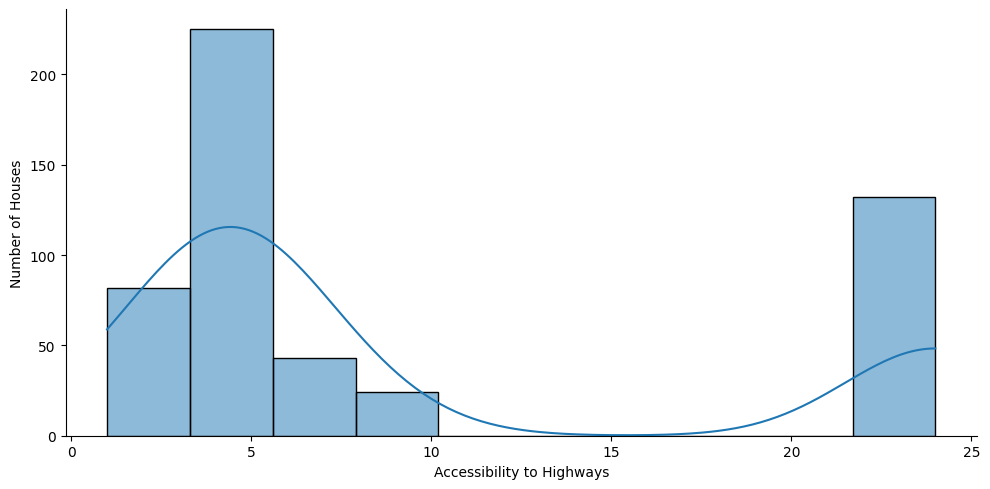

In [ ]:
plt.figure(dpi=200)
sns.displot(
    x=data.RAD,
    kde=True,
    aspect=2,
)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Number of Homes')

plt.show()

Close to 150 Boston houses have very good access to highways.

#### Next to the River? ⛵️

**Challenge**

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. The bar chart should look something like this:

<img src=https://i.imgur.com/AHwoQ6l.png height=350>

You can make your life easier by providing a list of values for the x-axis (e.g., `x=['No', 'Yes']`)

In [ ]:
data_chas = data.value_counts('CHAS')

In [ ]:
chas_bar = px.bar(x=['No', 'Yes'],
                  y=data_chas.values,
                  title='Next to Charles River?',
                  color=data_chas.index,
                  color_continuous_scale='Sunset',
                  )

chas_bar.update_layout(coloraxis_showscale=False,
                       xaxis_title='Property Located Next to the River?',
                       yaxis_title='Number of Homes')

chas_bar.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

**Challenge**

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices?

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check your intuition regarding the questions above on the `pairplot`.

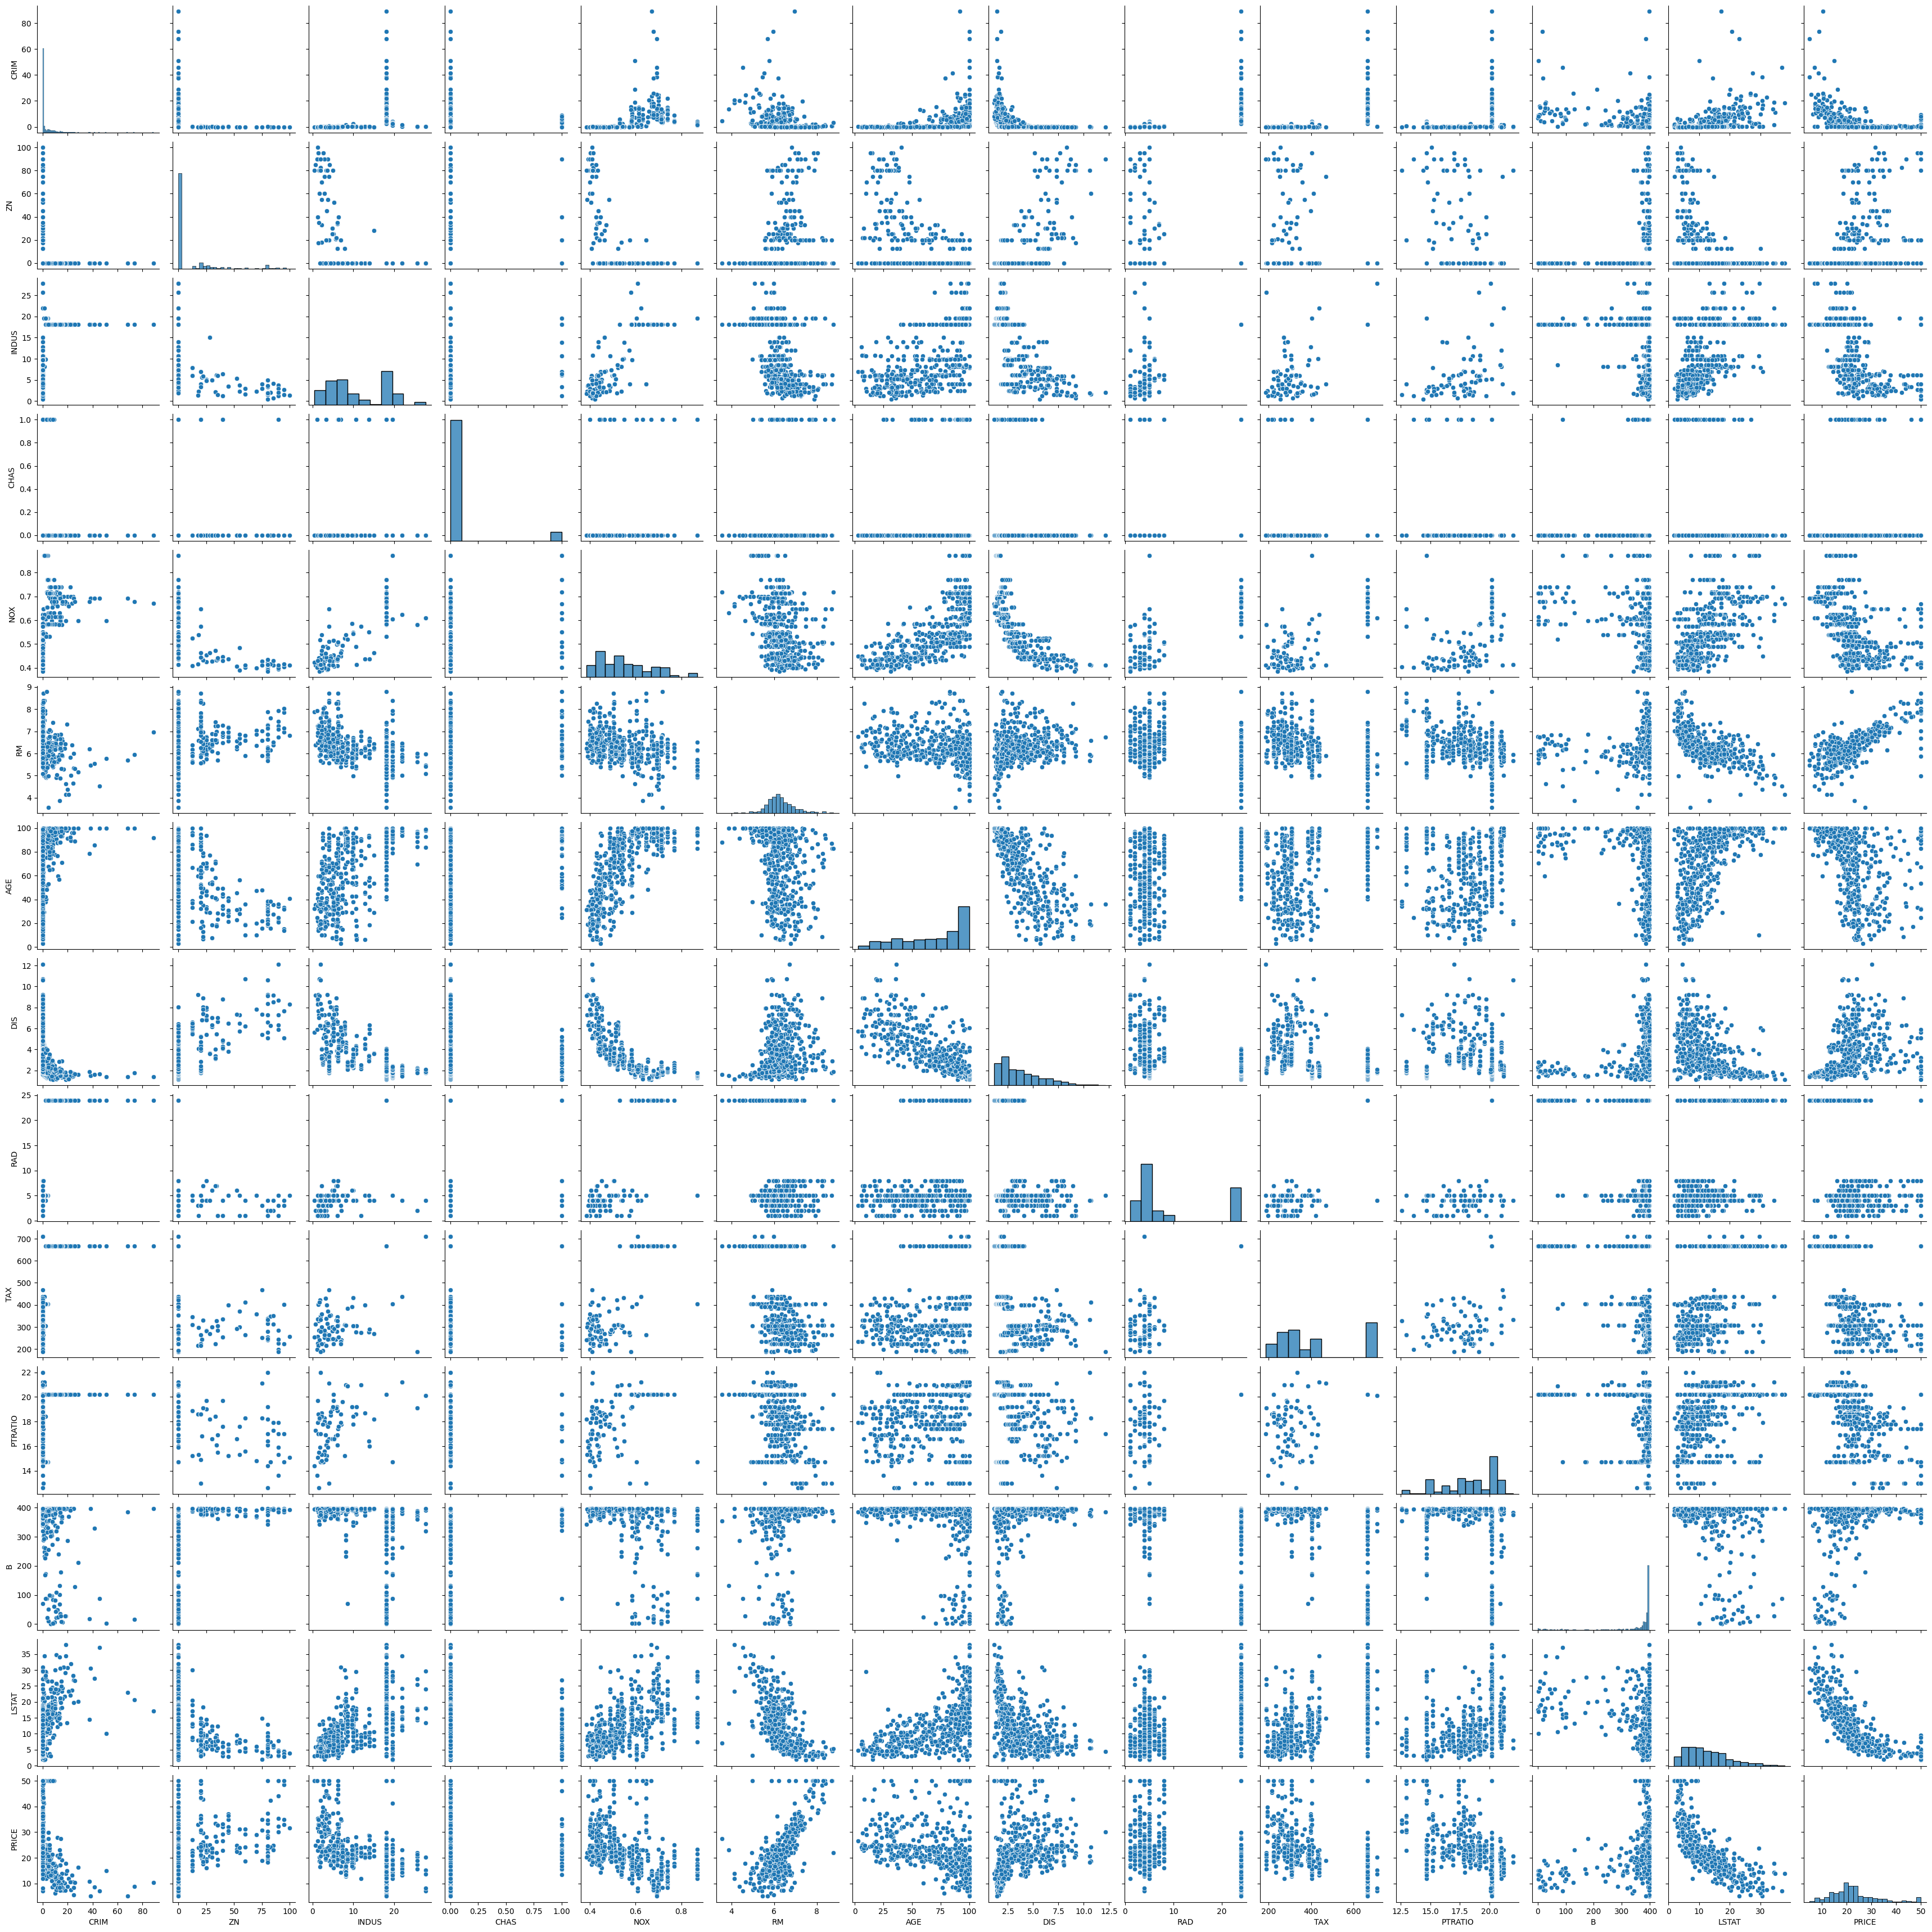

In [ ]:
sns.pairplot(data)

# You can even include a regression line
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

plt.show()

_Q1. What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?_

**Assumption:** The further away you are from the employment center the lesser the value of NOX.

**Observation:** Assumption holds true.

_Q2. What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?_

**Assumption:** Home value increases with more rooms.

**Observation:** Assumption doesn't always hold true. While there are certainly house which have both high value and high rooms, there are also houses which are low cost despite having a high number of rooms.

_Q3. What about the amount of poverty in an area (LSTAT) and home prices?_

**Assumption:** House value decreases with high poverty.

**Observation:** Assumption holds true.

**Challenge**

Use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

Try adding some opacity or `alpha` to the scatter plots using keyword arguments under `joint_kws`.

#### Distance from Employment vs. Pollution

**Challenge**:

Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases?

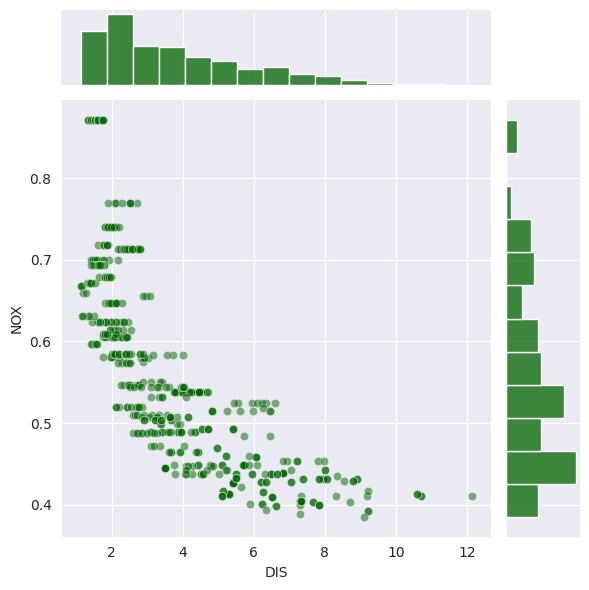

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                x='DIS',
                y='NOX',
                color='darkgreen',
                joint_kws={'alpha': 0.5},
                )
plt.show()

We see that pollution goes down as we go further and further out of town. This makes intuitive sense. However, even at the same distance of 2 miles to employment centres, we can get very different levels of pollution. By the same token, DIS of 9 miles and 12 miles have very similar levels of pollution.

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

**Challenge**:

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

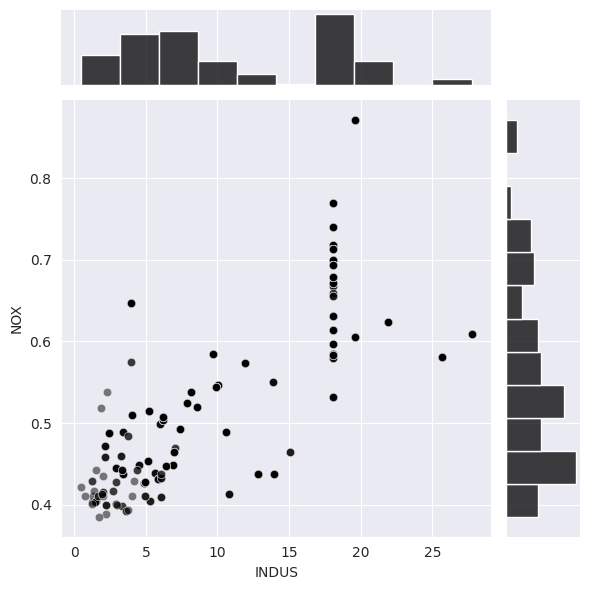

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                x='INDUS',
                y='NOX',
                color='black',
                joint_kws={'alpha': 0.5},
                )
plt.show()

We see the highest NOX value at an INDUS value close to 20, but then we see a significant drop in NOX values. At an INDUS value of 18, we can see that the NOX value varies quite a bit.

#### % of Lower Income Population vs Average Number of Rooms

**Challenge**

Compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

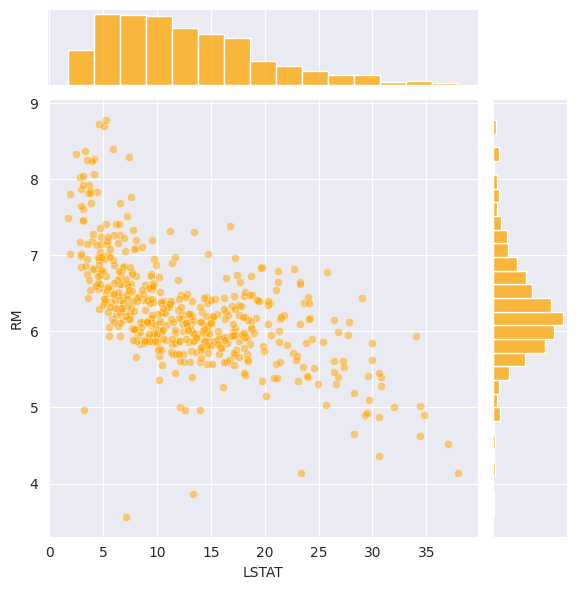

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                x='LSTAT',
                y='RM',
                color='orange',
                joint_kws={'alpha': 0.5},
                )
plt.show()

In the top left corner we see that all the homes with 8 or more rooms, LSTAT is well below 10%.

#### % of Lower Income Population versus Home Price

**Challenge**

Compare LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

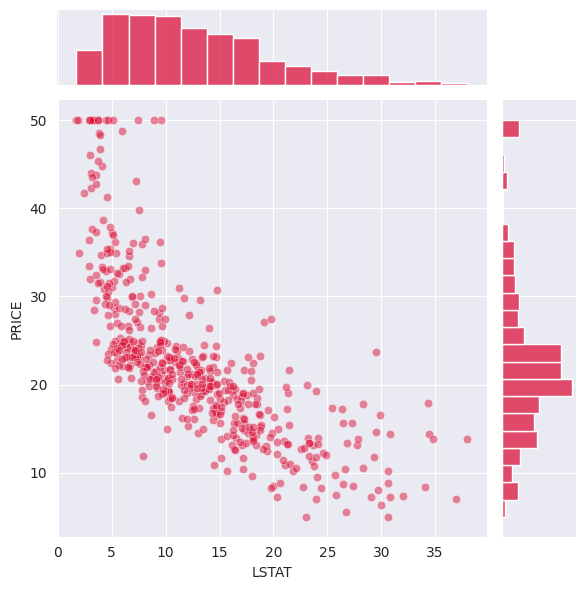

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                x='LSTAT',
                y='PRICE',
                color='crimson',
                joint_kws={'alpha': 0.5},
                )
plt.show()

In the top left corner we see that all the homes with high prices, LSTAT is well below 10%.

#### Number of Rooms versus Home Value

**Challenge**

Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊

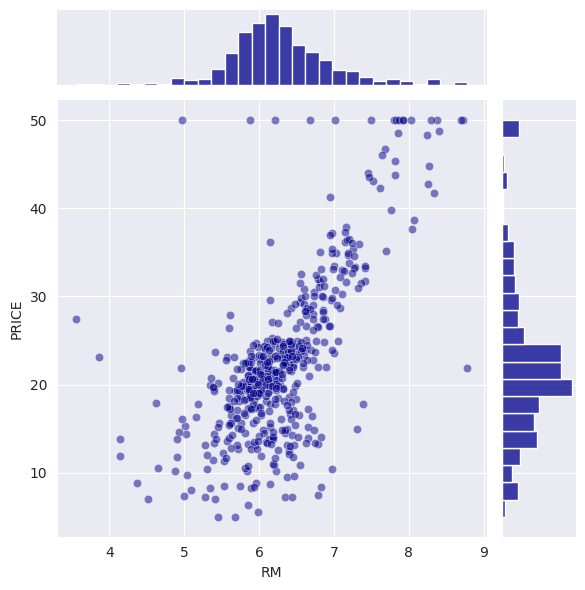

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data,
                x='RM',
                y='PRICE',
                color='darkblue',
                joint_kws={'alpha': 0.5},
                )
plt.show()

Again, we see those homes at the $50,000 mark all lined up at the top of the chart. Perhaps there was some sort of cap or maximum value imposed during data collection.

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world.

**Challenge**

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20.
* To get the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning.


Hint: Remember, your **target** is your home PRICE, and your **features** are all the other columns you'll use to predict the price.


In [284]:
# Get X(independent variables or features) and y(independent variables or target).
X = data.loc[:,data.columns != 'PRICE']
y = data.PRICE

# Using the train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.20)

In [285]:
# % of training set
train_pct = 100*len(X_train)/len(X)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/X.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression

In a previous lesson, we had a linear model with only a single feature (our movie budgets). This time we have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

**Challenge**

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [286]:
# Create LinearRegression object.
regression= LinearRegression()

# Run the regression calculation.
regression.fit(X_train, y_train)

LinearRegression()

In [287]:
# Check for the r-squared value.
regression.score(X_train, y_train)

0.750121534530608

This means that our model can explain about 75%  of the variance in the house prices.

An r-squared values of 0.75 is really good.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

**Challenge** Print out the coefficients (the thetas in the equation above) for the features. Hint: You'll see a nice table if you stick the coefficients in a DataFrame.

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room?

In [306]:
# Print out the coefficients (the thetas in the equation above) for the features.
reg_coef = pd.DataFrame({'col': data.columns.values.tolist()[:13], 'coef': regression.coef_})
reg_coef.set_index('col', inplace=True)
reg_coef

,coef
col,
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30


_**Q1.** We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?_

**A1.** RM's coefficient is positive.

_**Q2.** What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?_

**A2.** LSAT's coefficient is negative. Yes, it matches my intuition and the scatter plot above.

In [289]:
# Calculate the premium you would have to pay for an extra room.
print(f"The price premium for having an extra room is  ${(reg_coef.loc['RM'].values[0] * 1000):.5}.")

The price premium for having an extra room is  $3108.5.


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

**Challenge**: Create two scatter plots.

The first plot should be actual values (`y_train`) against the predicted value values:

<img src=https://i.imgur.com/YMttBNV.png height=350>

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals 😊


The second plot should be the residuals against the predicted prices. Here's what we're looking for:

<img src=https://i.imgur.com/HphsBsj.png height=350>



In [290]:
# Get predicted values based on the training dataset(i.e., X_train)
predicted_values = regression.predict(X_train)

# Calculate the residual(distance between the training dateset values and the predicted values )
residuals = (y_train - predicted_values)

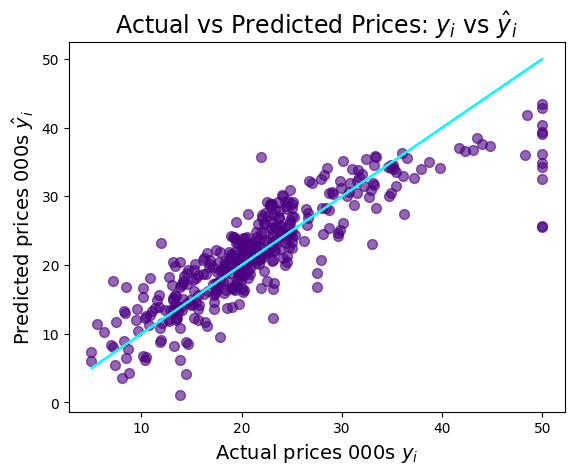

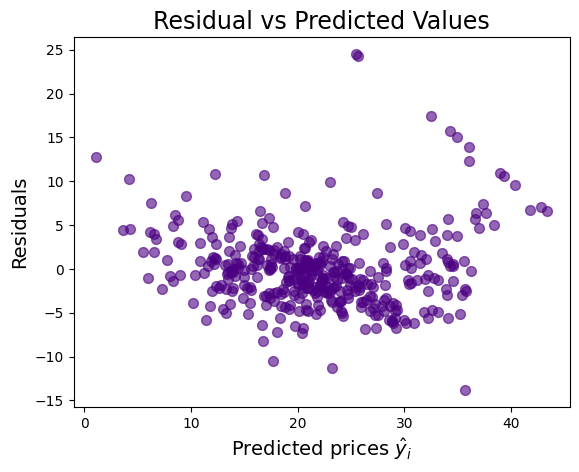

In [307]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.title('Actual vs Predicted Prices: $y_i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=14)

plt.scatter(x=y_train,
            y=predicted_values,
            alpha=0.6,
            c='indigo',
            s=50,
            )

plt.plot(y_train,
         y_train,
         color='cyan'
         )

plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.title('Residual vs Predicted Values', fontsize=17)
plt.xlabel('Predicted prices $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.scatter(x=predicted_values,
            y=residuals,
            alpha=0.6,
            c='indigo',
            s=50,
            )

plt.show()


Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like:

<img src=https://i.imgur.com/7QBqDtO.png height=400>

**Challenge**

* Calculate the mean and the skewness of the residuals.
* Again, use Seaborn's `.displot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)
* Is the skewness different from zero? If so, by how much?
* Is the mean different from zero?

In [292]:
# Calculate the mean and the skewness of the residuals.
res_mean = round(residuals.mean(), 2)
res_skew = round(residuals.skew(), 2)
print(f"Mean of Residuals: {res_mean}.")
print(f"Skew of Residuals: {res_skew}.")

Mean of Residuals: 0.0.
Skew of Residuals: 1.46.


<Figure size 1280x960 with 0 Axes>

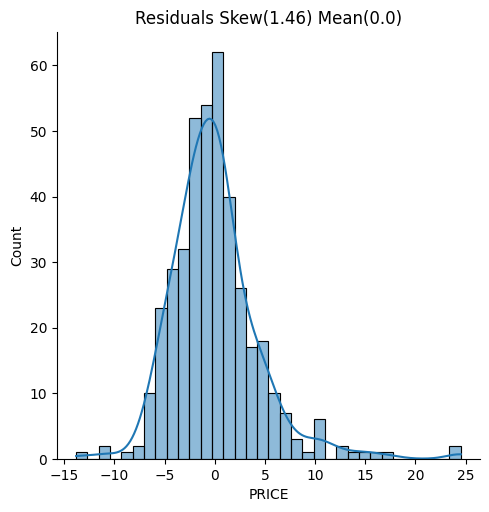

In [293]:
# Plot Residuals
plt.figure(dpi=200)
sns.displot(
    x=residuals,
    kde=True,
)
plt.title(f'Residuals Skew({res_skew}) Mean({res_mean})')

plt.show()

We see that the residuals have a skewness of 1.46. There could be some room for improvement here.  

### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.

**Challenge**

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation.

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data.
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew.
* Which distribution has a skew that's closer to zero?


<Figure size 1280x960 with 0 Axes>

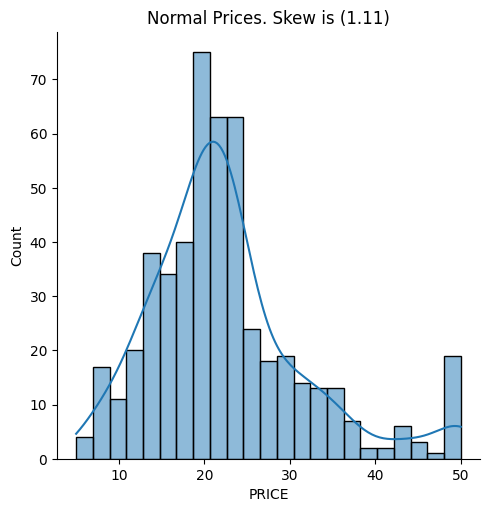

In [294]:
# Calculate the skew price data.
tgt_skew=data.PRICE.skew()

# Use Seaborn's .displot() to show a histogram and KDE of the price data.
plt.figure(dpi=200)
sns.displot(
    x=data.PRICE,
    kde=True,
)
plt.title(f'Normal Prices. Skew is ({tgt_skew:.3})')

plt.show()

In [313]:
# Use NumPy's log() function to create a Series that has the log prices.
log_prices = np.log(data.PRICE)
log_price_skew = log_prices.skew()

<Figure size 1280x960 with 0 Axes>

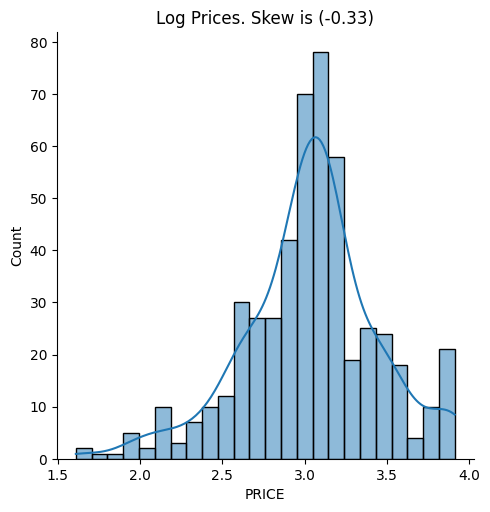

In [296]:
# Plot the log prices using Seaborn's .displot() and calculate the skew.
plt.figure(dpi=200)
sns.displot(
    x=log_prices,
    kde=True,
)
plt.title(f'Log Prices. Skew is ({log_price_skew:.3})')

plt.show()

_Q1. Which distribution has a skew that's closer to zero?_

**A.** The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals.

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices.

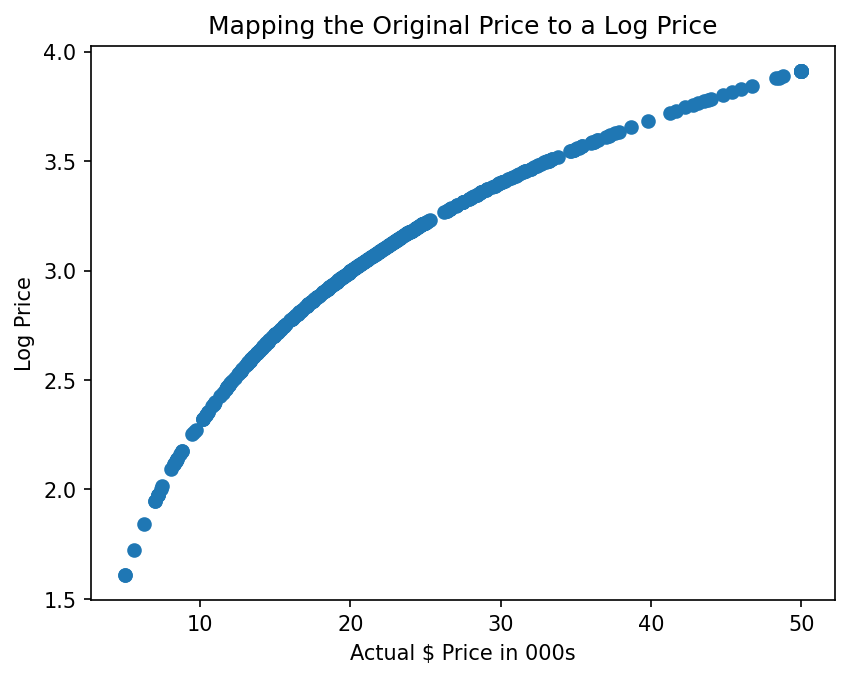

In [297]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

**Challenge**:

* Use `train_test_split()` with the same random state as before to make the results comparable.
* Run a second regression, but this time use the transformed target data.
* What is the r-squared of the regression on the training data?
* Have we improved the fit of our model compared to before based on this measure?


In [305]:
# Get X(independent variables or features) and y(independent variables or target).
X = data.loc[:,data.columns != 'PRICE']
y = log_prices

# Using the train_test_split function.
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, random_state=10, test_size=0.20)
y

0     3.18
1     3.07
2     3.55
3     3.51
4     3.59
      ... 
501   3.11
502   3.03
503   3.17
504   3.09
505   2.48
Name: PRICE, Length: 506, dtype: float64

In [299]:
# Create LinearRegression object.
log_regression= LinearRegression()

# Run the regression calculation.
log_regression.fit(X_new_train, y_new_train)

# Check for the r-squared value.
log_regression.score(X_new_train, y_new_train)

0.7930234826697584

This means that our model can explain about 79%  of the variance in the house prices. This is an increase of 4% from the previous regression model.

In [315]:
# Get predicted values based on the training dataset(i.e., X_new_train)
predicted_log_values = log_regression.predict(X_new_train)

# Calculate the residual(distance between the training dateset values and the predicted values )
residuals_log = (y_new_train - predicted_log_values)

## Evaluating Coefficients with Log Prices

**Challenge**: Print out the coefficients of the new regression model.

* Do the coefficients still have the expected sign?
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher?

Hint: Use a DataFrame to make the output look pretty.

In [316]:
# Print out the coefficients (the thetas in the equation above) for the features.
new_reg_coef = pd.DataFrame({'col': data.columns.values.tolist()[:13], 'new_coef': log_regression.coef_})
new_reg_coef.set_index('col', inplace=True)

new_reg_coef

,new_coef
col,
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01


_Q1. Do the coefficients still have the expected sign?_

*A1.* Coefficients still have expected signs except for INDUS which no longer has a negative coefficient.

_Q2. Is being next to the river a positive based on the data?_

*A2.* Being close to the river results in higher property prices because CHAS has a coefficient greater than zero. Therefore, property prices are higher next to the river.

_Q3. How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher?_

A3. More students per teacher - a higher PTRATIO - is a clear negative. Smaller classroom sizes are indicative of higher quality education, so have a negative coefficient for PTRATIO.

## Regression with Log Prices & Residual Plots

**Challenge**:

* Copy-paste the cell where you've created scatter plots of the actual versus the predicted home prices as well as the residuals versus the predicted values.
* Add 2 more plots to the cell so that you can compare the regression outcomes with the log prices side by side.
* Use `indigo` as the colour for the original regression and `navy` for the color using log prices.

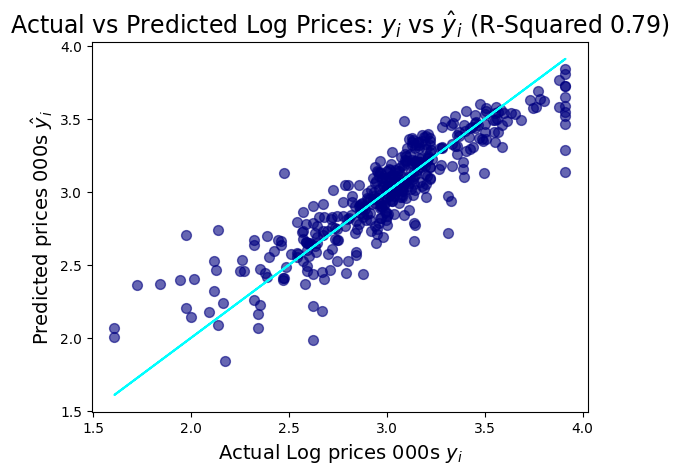

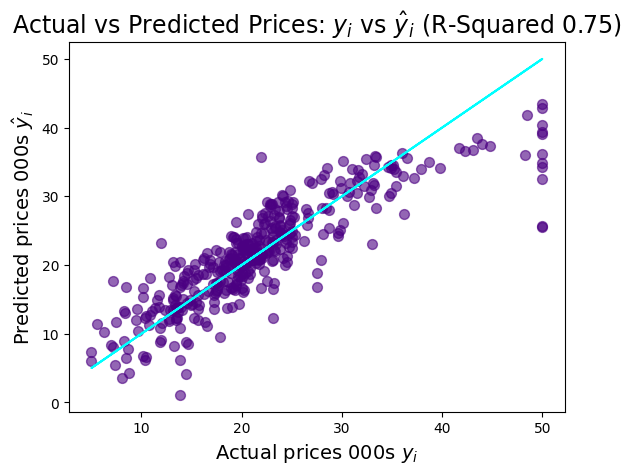

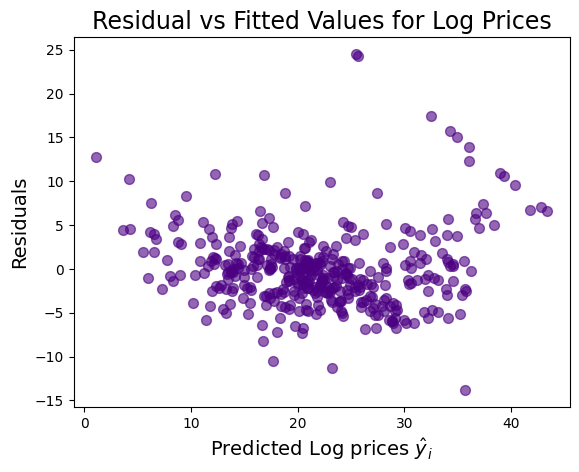

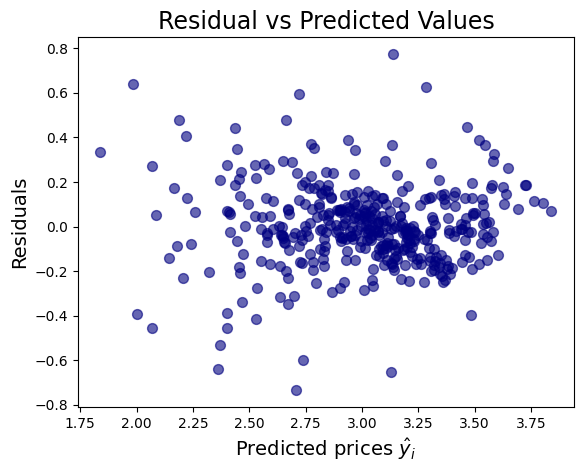

In [327]:
# Graph of Actual vs Predicted Log Prcies
plt.figure(dpi=100)
plt.title(f'Actual vs Predicted Log Prices: $y_i$ vs $\hat y_i$ (R-Squared {log_regression.score(X_new_train, y_new_train):.2})', fontsize=17)
plt.xlabel('Actual Log prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=14)

plt.scatter(x=y_new_train,
            y=predicted_log_values,
            alpha=0.6,
            c='navy',
            s=50,
            )

plt.plot(y_new_train,
         y_new_train,
         color='cyan'
         )

plt.show()

# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.title(f'Actual vs Predicted Prices: $y_i$ vs $\hat y_i$ (R-Squared {regression.score(X_train, y_train):.2})', fontsize=17)
plt.xlabel('Actual prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=14)

plt.scatter(x=y_train,
            y=predicted_values,
            alpha=0.6,
            c='indigo',
            s=50,
            )

plt.plot(y_train,
         y_train,
         color='cyan'
         )

plt.show()

# Residuals vs Predicted values(Log prices)
plt.figure(dpi=100)
plt.title('Residual vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log prices $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.scatter(x=predicted_values,
            y=residuals,
            alpha=0.6,
            c='indigo',
            s=50,
            )

plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.title('Residual vs Predicted Values', fontsize=17)
plt.xlabel('Predicted prices $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.scatter(x=predicted_log_values,
            y=residuals_log,
            alpha=0.6,
            c='navy',
            s=50,
            )

plt.show()

It's hard to see a difference here just by eye. The predicted values seems slightly closer to the cyan line, but eyeballing the charts is not terribly helpful in this case.

**Challenge**:

Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [320]:
# Calculate the mean and the skewness of the residuals using log prices.
res_log_mean = round(residuals_log.mean(), 2)
res_log_skew = round(residuals_log.skew(), 2)
print(f"Mean of Residuals: {res_log_mean}.")
print(f"Skew of Residuals: {res_log_skew}.")

Mean of Residuals: -0.0.
Skew of Residuals: 0.09.


Mean and Skew of residuals using log prices is indeed closer to 0 compared to the original model.

<Figure size 1280x960 with 0 Axes>

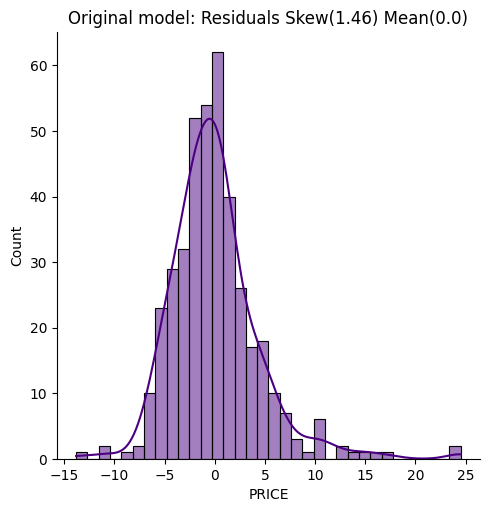

<Figure size 1280x960 with 0 Axes>

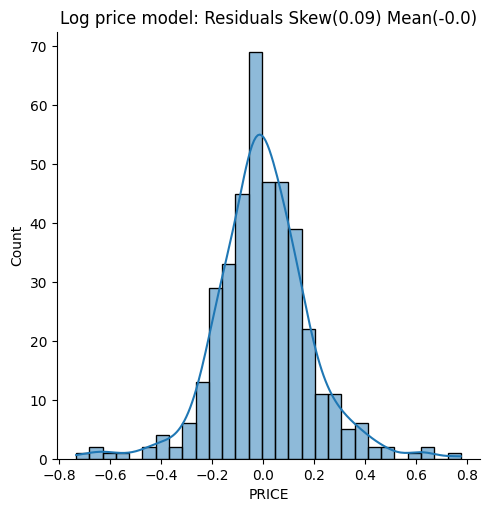

In [326]:
# Plot Residuals for Original Model
plt.figure(dpi=200)
sns.displot(
    x=residuals,
    kde=True,
    color='indigo',
)
plt.title(f'Original model: Residuals Skew({res_skew}) Mean({res_mean})')

plt.show()

# Plot Residuals for Log Price Model
plt.figure(dpi=200)
sns.displot(
    x=residuals_log,
    kde=True,
)
plt.title(f'Log price model: Residuals Skew({res_log_skew}) Mean({res_log_mean})')

plt.show()

Our new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation.

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in.

**Challenge**

Compare the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

In [329]:
print(f"Original Model Test Data r-squared: {regression.score(X_test, y_test):.2}")
print(f'Log Model Test Data r-squared: {log_regression.score(X_new_test, y_new_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data. However, our r-squared still remains high, so we have built a useful model.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [332]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


**Challenge**

Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate? You'll have to [reverse the log transformation with `.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp) to find the dollar value.

In [333]:
# Make prediction
log_estimate = log_regression.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
# or use
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2


**Challenge**

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [335]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [336]:
# Solution:
# Set Property Characteristics
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [338]:
# Make prediction
log_estimate = log_regression.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# Convert Log Prices to Acutal Dollar Values
dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25792.0
